<a href="https://colab.research.google.com/github/ruddypp/Tugas-Akhir-Dicoding/blob/main/%5BClustering%5D_Submission_Akhir_BMLP_Rudy2nd_Ver.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset **tanpa label** dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.
   
2. **Ketentuan Dataset**:
   - **Tanpa label**: Dataset tidak boleh memiliki label atau kelas.
   - **Jumlah Baris**: Minimal 1000 baris untuk memastikan dataset cukup besar untuk analisis yang bermakna.
   - **Tipe Data**: Harus mengandung data **kategorikal** dan **numerikal**.
     - *Kategorikal*: Misalnya jenis kelamin, kategori produk.
     - *Numerikal*: Misalnya usia, pendapatan, harga.

3. **Pembatasan**:  
   Dataset yang sudah digunakan dalam latihan clustering (seperti customer segmentation) tidak boleh digunakan.

In [ ]:
#Type your code here

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [ ]:
# 2. Import Library yang diperlukan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

In [ ]:
# 3. Memuat Dataset
# Pastikan dataset 'bank_transactions.csv' sudah diunggah
try:
    data = pd.read_csv('/content/pizza_sales.csv')
    print("Dataset berhasil dimuat!")
# pesan untuk menampilkan jika dataset belum diunggah / tidak sesuai namanya
except FileNotFoundError:
    print("File tidak ditemukan. pastikan anda menggungah dataset 'bank_transactions.csv'")

# Menampilkan cuplikan dataset
data.head()

Dataset berhasil dimuat!


,pizza_id,order_id,pizza_name_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name
0,1.0,1.0,hawaiian_m,1.0,1/1/2015,11:38:36,13.25,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza
1,2.0,2.0,classic_dlx_m,1.0,1/1/2015,11:57:40,16.00,16.00,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza
2,3.0,2.0,five_cheese_l,1.0,1/1/2015,11:57:40,18.50,18.50,L,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",The Five Cheese Pizza
3,4.0,2.0,ital_supr_l,1.0,1/1/2015,11:57:40,20.75,20.75,L,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza
4,5.0,2.0,mexicana_m,1.0,1/1/2015,11:57:40,16.00,16.00,M,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

Jumlah baris dan kolom: (48620, 12)

Tipe data setiap kolom:
 pizza_id             float64
order_id             float64
pizza_name_id         object
quantity             float64
order_date            object
order_time            object
unit_price           float64
total_price          float64
pizza_size            object
pizza_category        object
pizza_ingredients     object
pizza_name            object
dtype: object

Jumlah data yang hilang di setiap kolom:
 pizza_id             0
order_id             0
pizza_name_id        0
quantity             0
order_date           0
order_time           0
unit_price           0
total_price          0
pizza_size           0
pizza_category       0
pizza_ingredients    0
pizza_name           0
dtype: int64

Statistik deskriptif data numerik:
            pizza_id      order_id      quantity    unit_price   total_price
count  48620.000000  48620.000000  48620.000000  48620.000000  48620.000000
mean   24310.500000  10701.479761      1.019622     16.

<ipython-input-4-0f951ccc42bc>:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(data[col].mean(), inplace=True)
<ipython-input-4-0f951ccc42bc>:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usin

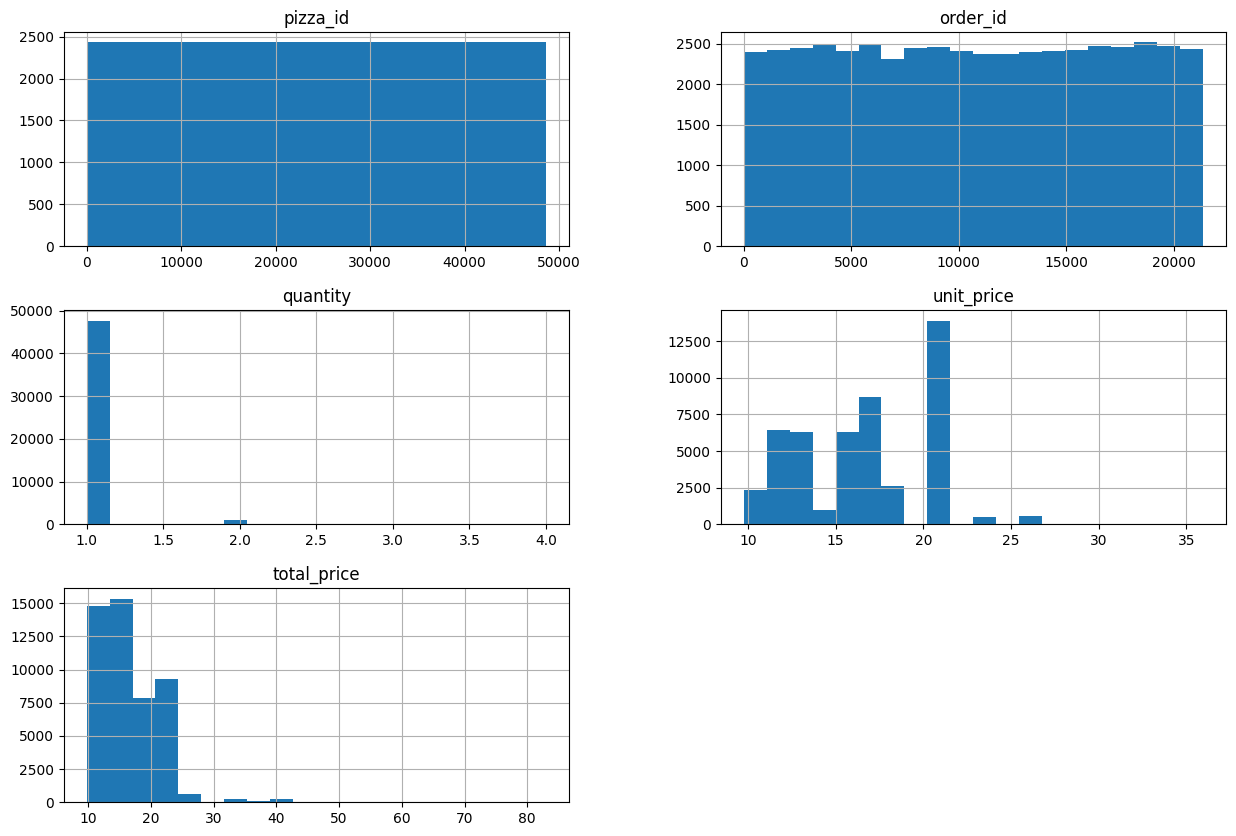

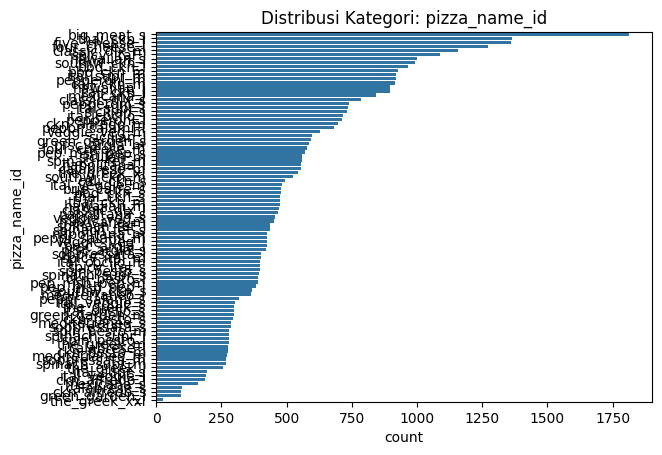

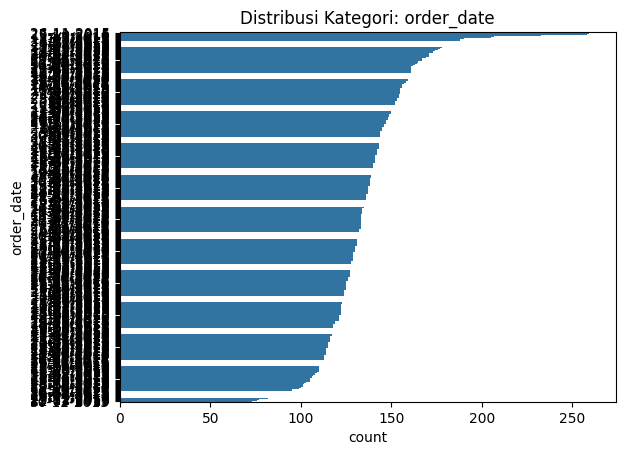

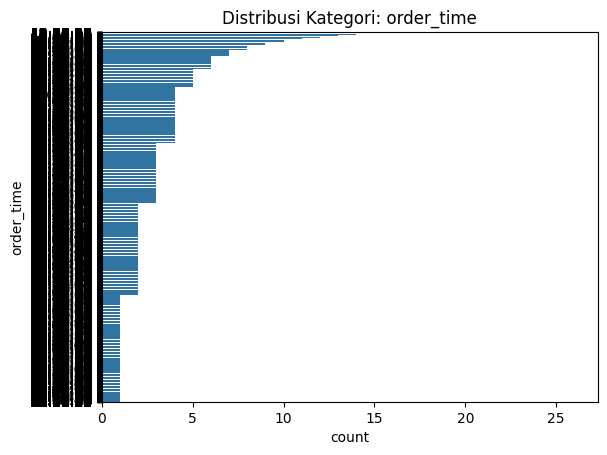

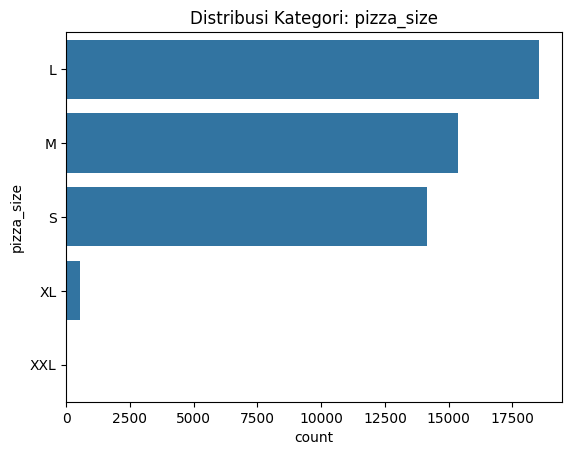

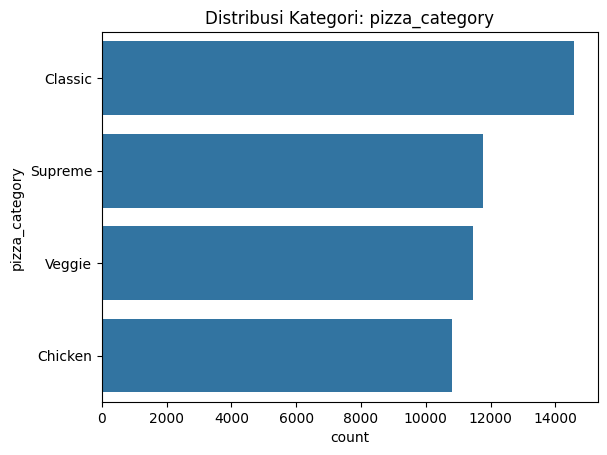

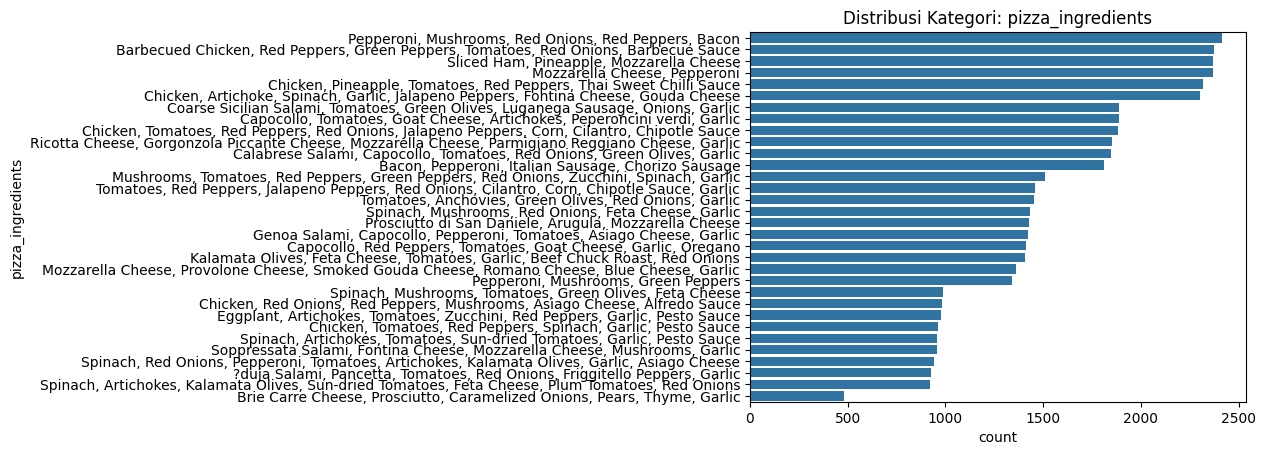

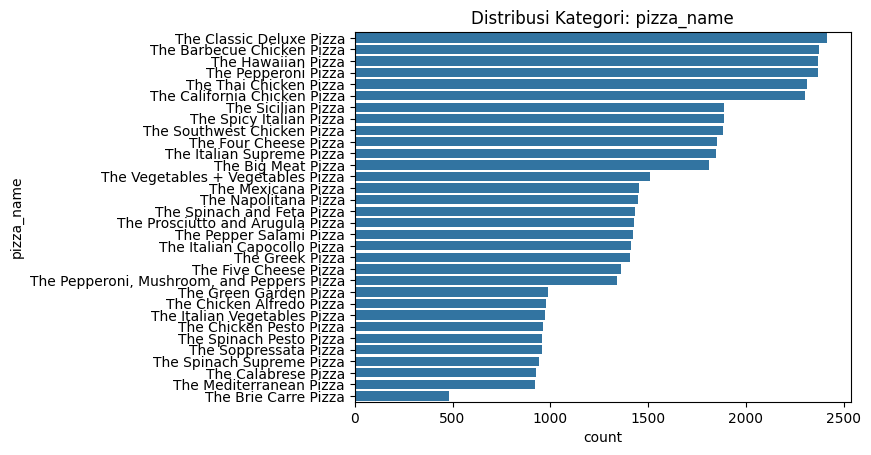

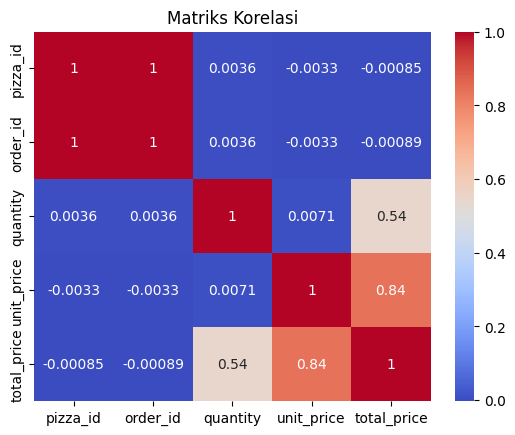

In [ ]:
# 4. Exploratory Data Analysis (EDA)

# Memahami struktur data, apa aja yang ada, ada berapa baris dan kolom
print("Jumlah baris dan kolom:", data.shape)
print("\nTipe data setiap kolom:\n", data.dtypes)

# Menangani data yang hilang kalau ada, tangani
missing= data.isnull().sum()
print("\nJumlah data yang hilang di setiap kolom:\n", missing)

# Mengisi data yang hilang pake nilai rata-rata kalau angka, atau nilai terbanyak kalau kategori
for col in data.columns:
    if data[col].dtype == 'object':
        data[col].fillna(data[col].mode()[0], inplace=True)
    else:
        data[col].fillna(data[col].mean(), inplace=True)

# Analisis distribusi data numerik menggunakan statistik dasar
print("\nStatistik deskriptif data numerik:\n", data.describe())
data.hist(bins=20, figsize=(15, 10))
plt.show()

# Visualisasi data kategorikal
for col in data.select_dtypes(include=['object']).columns:
    sns.countplot(y=data[col], order=data[col].value_counts().index)
    plt.title(f"Distribusi Kategori: {col}")
    plt.show()

# Analisis korelasi untuk data numerikal pake heatmap
numerical_cols = data.select_dtypes(include=[np.number]).columns
sns.heatmap(data[numerical_cols].corr(), annot=True, cmap='coolwarm')
plt.title("Matriks Korelasi")
plt.show()


# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah.

In [ ]:
# 5. Data Preprocessing
# Ubah kategori ke angka biar gampang dianalisis
encoder = LabelEncoder()
for col in data.select_dtypes(include=['object']).columns:
    data[col] = encoder.fit_transform(data[col])

# Normalisasi fitur numerik biar lebih rapi
scaler = StandardScaler()
data[numerical_cols] = scaler.fit_transform(data[numerical_cols])

# Cetak hasil data preprocessing
print("\nData setelah preprocessing:\n", data.head())



Data setelah preprocessing:
    pizza_id  order_id  pizza_name_id  quantity  order_date  order_time  \
0 -1.732015 -1.731453             27 -0.137141           0         414   
1 -1.731944 -1.731292             18 -0.137141           0         911   
2 -1.731873 -1.731292             20 -0.137141           0         911   
3 -1.731801 -1.731292             32 -0.137141           0         911   
4 -1.731730 -1.731292             42 -0.137141           0         911   

   unit_price  total_price  pizza_size  pizza_category  pizza_ingredients  \
0   -0.895736    -0.804866           1               1                 23   
1   -0.136435    -0.185127           1               1                 20   
2    0.553839     0.378272           0               3                 17   
3    1.175085     0.885331           0               2                  4   
4   -0.136435    -0.185127           1               3                 31   

   pizza_name  
0          12  
1           7  
2           8 

# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

In [ ]:
# 6. Pembangunan Model Clustering
# a. Pembangunan Model Clustering Pakai 3 cluster dulu
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(data)

KMeans(n_clusters=3, random_state=42)

## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

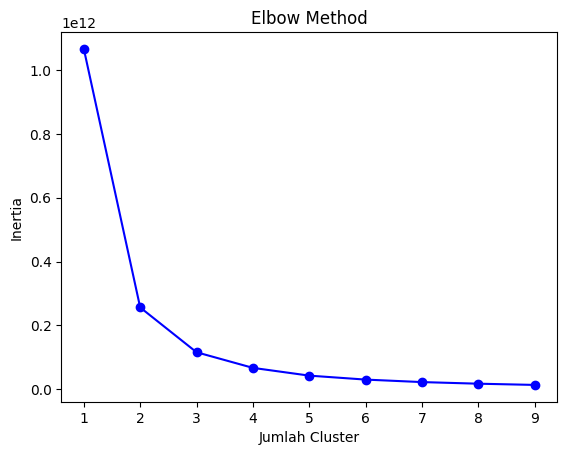

Jumlah cluster: 2, Silhouette Score: 0.6366
Jumlah cluster: 3, Silhouette Score: 0.5923
Jumlah cluster: 4, Silhouette Score: 0.5633
Jumlah cluster: 5, Silhouette Score: 0.5527
Jumlah cluster: 6, Silhouette Score: 0.5391
Jumlah cluster: 7, Silhouette Score: 0.5293
Jumlah cluster: 8, Silhouette Score: 0.5241
Jumlah cluster: 9, Silhouette Score: 0.5231


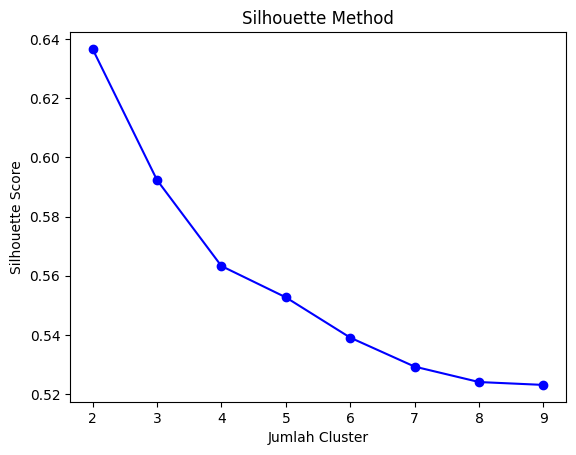

In [ ]:
# b. Evaluasi Model Clustering
# Menggunakan metode Elbow
inertia = []
K = range(1, 10)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data)
    inertia.append(kmeans.inertia_)

plt.plot(K, inertia, 'bo-')
plt.xlabel("Jumlah Cluster")
plt.ylabel("Inertia")
plt.title("Elbow Method")
plt.show()

# Menggunakan Silhouette Score buat tahu kualitas cluster
silhouette_scores = [] # Initialize silhouette_scores here before using it
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(data)
    score = silhouette_score(data, labels)
    silhouette_scores.append(score)
    print(f"Jumlah cluster: {k}, Silhouette Score: {score:.4f}")

# Setelah menggunakan sillhoute score akan menampilkan angkanya selain grafik
plt.plot(range(2, 10), silhouette_scores, 'bo-') #Now it can find silhouette_scores
plt.xlabel("Jumlah Cluster")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Method")
plt.show()


# Pilih jumlah cluster optimal (misalnya 3 berdasarkan evaluasi)
optimal_clusters = 3
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
data['Cluster'] = kmeans.fit_predict(data)

## **c. Feature Selection (Opsional)**

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

In [ ]:
#Type your code here

## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

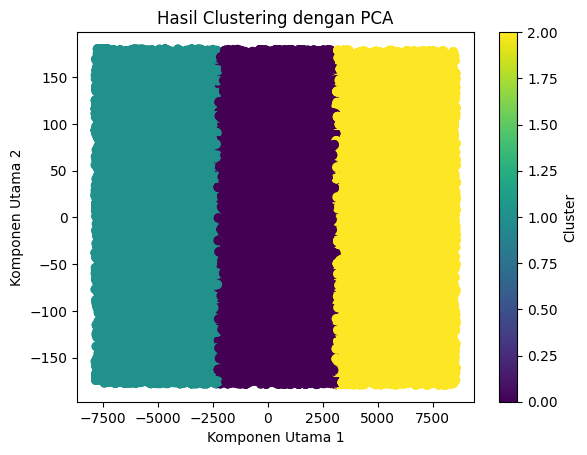

In [ ]:
# d. Visualisasi Hasil Clustering pake PCA (biar keliatan 2D)
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(data.drop(columns=['Cluster']))
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=data['Cluster'], cmap='viridis')
plt.title("Hasil Clustering dengan PCA")
plt.xlabel("Komponen Utama 1")
plt.ylabel("Komponen Utama 2")
plt.colorbar(label='Cluster')
plt.show()

## **e. Analisis dan Interpretasi Hasil Cluster**

Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?

In [ ]:
# e. Analisis dan Interpretasi Hasil Cluster dengan melihat isi tiap cluster
print("Distribusi anggota setiap cluster:")
print(data['Cluster'].value_counts())

for cluster in range(optimal_clusters):
    print(f"\nCluster {cluster}:")
    cluster_data = data[data['Cluster'] == cluster]
    print(cluster_data.describe())


Distribusi anggota setiap cluster:
Cluster
1    18397
0    15382
2    14841
Name: count, dtype: int64

Cluster 0:
           pizza_id      order_id  pizza_name_id      quantity    order_date  \
count  15382.000000  15382.000000   15382.000000  15382.000000  15382.000000   
mean      -0.007203     -0.007281      41.571447     -0.046265    178.095046   
std        0.996684      0.996704      26.543725      0.791800    104.768600   
min       -1.727170     -1.727408       0.000000     -0.137141      0.000000   
25%       -0.865758     -0.867707      19.000000     -0.137141     86.000000   
50%       -0.011898     -0.015369      41.000000     -0.137141    178.500000   
75%        0.852933      0.860271      65.000000     -0.137141    270.000000   
max        1.727384      1.718353      90.000000      6.852174    357.000000   

         order_time    unit_price   total_price    pizza_size  pizza_category  \
count  15382.000000  15382.000000  15382.000000  15382.000000    15382.000000   
mea

Tulis hasil interpretasinya di sini.
1. Cluster 0: Karakteristik Utama:
Rata-rata nilai pesanan (quantity) rendah (-0,046) dengan variasi cukup kecil (std 0,791).
Sebagian besar pesanan berada pada kategori pizza sederhana dengan rata-rata 15,53 nama pizza dan 14,86 bahan per pesanan.
Waktu transaksi cenderung terjadi di tengah hari (mean 8349, sekitar pukul 13:30).
Harga dan Kategori:
Unit price rata-rata mendekati nol (0,002) menunjukkan fokus pada pesanan murah.
Kategori pizza didominasi oleh kategori 1 (1,48).
Kesimpulan:
Cluster ini merepresentasikan pengguna dengan aktivitas terbatas, cenderung memesan produk yang lebih murah dan sederhana. Program diskon atau promosi dapat meningkatkan keterlibatan mereka.


2. Cluster 1:Karakteristik Utama:
Aktivitas transaksi lebih dinamis dengan rata-rata pesanan sedikit lebih tinggi (0,083) tetapi variasi besar (std 1,28).
Pesanan tersebar pada berbagai kategori dengan rata-rata 15,48 nama pizza dan 14,86 bahan.
Waktu transaksi lebih bervariasi (mean 2800, sekitar pukul 07:45 pagi).
Harga dan Kategori:
Unit price lebih rendah (-0,0008) dengan total price rata-rata lebih tinggi (0,043).
Kategori pizza menunjukkan diversifikasi yang serupa dengan Cluster 0.
Kesimpulan:
Pengguna dalam cluster ini lebih aktif dan dinamis, tetapi pola transaksi tidak stabil. Promosi seperti program loyalitas atau insentif untuk pemesanan lebih besar dapat membantu meningkatkan stabilitas dan nilai transaksi.

3. Karakteristik Utama:
Pengguna paling aktif dengan rata-rata pesanan (-0,054) yang sedikit lebih rendah dibanding Cluster 1, tetapi variasinya lebih kecil (std 0,763).
Memesan pizza dengan lebih banyak bahan (rata-rata 14,91 bahan per pesanan) dan variasi pizza lebih luas (mean 15,53 nama pizza).
Waktu transaksi terjadi di malam hari (mean 13521, sekitar pukul 18:45).
Harga dan Kategori:
Unit price sedikit lebih rendah (-0,001), tetapi total price menunjukkan variasi yang kecil (-0,030).
Cenderung memilih kategori pizza yang lebih tinggi (1,49).
Kesimpulan:
Cluster ini terdiri dari pengguna yang loyal dengan preferensi terhadap pizza yang lebih kompleks dan kategori tinggi. Mereka cocok untuk penawaran eksklusif, seperti akses prioritas atau reward berbasis frekuensi pemesanan.

# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [ ]:
# 7. Mengeksport Data
# Simpan hasil ke file baru
data.to_csv('clustered_pizza_sales.csv', index=False)
print("Hasil clustering telah disimpan ke 'clustered_pizza_sales.csv'.")


Hasil clustering telah disimpan ke 'clustered_pizza_sales.csv'.
